# Ch12. 축구 A매치 데이터로 다양한 집계하기

1993 ~ 2022 축구 A매치 데이터를 사용한다.

## 1. 전 세계 데이터를 value_counts로 간단히 집계하기

In [1]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6
pd.options.display.float_format = '{:.2f}'.format
url = './12_01_soccer_match.csv'

In [2]:
# date 열을 datetime으로 적용해 데이터 프레임부르기
df = pd.read_csv(url, parse_dates=['date'])
df

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
...,...,...,...,...,...,...,...,...,...,...
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win
47841,2022-06-14,Egypt,Africa,Away,Korea,Asia,1,4,Frendly,Lose


df의 열
- date : 경기 날짜
- nation : 경기를 치른 국가
- continent : nation 열의 국가의 소속대륙
- H/A : nation 열의 국가가 Home인지 Away인지 여부
- oppenent : 상대팀 
- o_continent : 상대팀의 소속대륙
- score : nation 열의 국가의 득점
- o_score : 상대팀의 득점
- tournament : 경기 구분(Friendly : 친선, WC : 월드컵, Others: 그외)
- result : 경기 결과

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47842 entries, 0 to 47841
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         47842 non-null  datetime64[ns]
 1   nation       47842 non-null  object        
 2   continent    47842 non-null  object        
 3   H/A          47842 non-null  object        
 4   oppenent     47842 non-null  object        
 5   o_continent  47842 non-null  object        
 6   score        47842 non-null  int64         
 7   o_score      47842 non-null  int64         
 8   tournament   47842 non-null  object        
 9   result       47842 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.7+ MB


국가별 A매치 경기수와 총 득점 집계하기

In [4]:
# 경기수가 많은 나라 top5
df['nation'].value_counts()[:5]

nation
Mexico          517
Saudi Arabia    471
USA             464
Korea           436
Brazil          433
Name: count, dtype: int64

<Axes: xlabel='nation'>

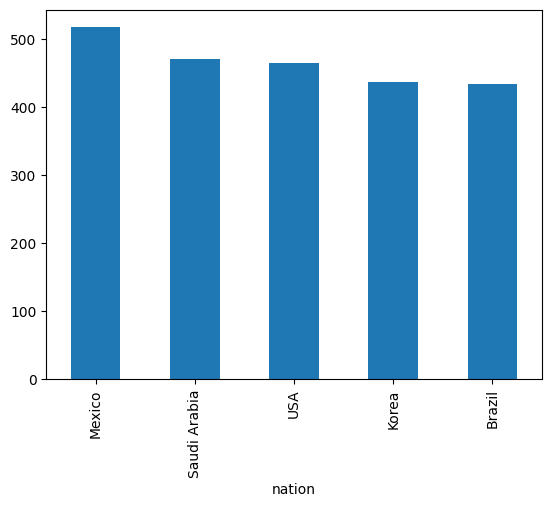

In [5]:
# 경기수가 많은 나라 top5 그래프
df['nation'].value_counts()[:5].plot(kind='bar')

In [6]:
# 승리 많은 나라 top5
cond1 = df['result'] == 'Win'
df.loc[cond1, 'nation'].value_counts()[:5]

nation
Brazil     292
Mexico     266
Spain      241
USA        239
Germany    237
Name: count, dtype: int64

<Axes: xlabel='nation'>

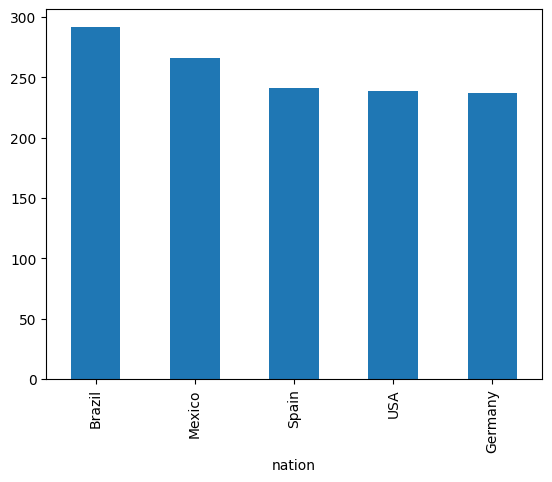

In [7]:
# 승리 많은 나라 top5 그래프
df.loc[cond1, 'nation'].value_counts()[:5].plot(kind='bar')

## 2. 전 세계 데이터를 groupby로 다양한 집계하기

In [8]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6
pd.options.display.float_format = '{:.2f}'.format
url = './12_01_soccer_match.csv'

# date 열을 datetime으로 적용해 데이터 프레임부르기
df = pd.read_csv(url, parse_dates=['date'])
df

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
...,...,...,...,...,...,...,...,...,...,...
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win
47841,2022-06-14,Egypt,Africa,Away,Korea,Asia,1,4,Frendly,Lose


국가별 누적 득점 집계하기

In [9]:
# 누적 득점 많은 나라 top5
df.groupby('nation')['score'].sum().sort_values(ascending=False)[:5]

nation
Brazil     954
Germany    875
Mexico     858
Spain      781
Japan      776
Name: score, dtype: int64

<Axes: xlabel='nation'>

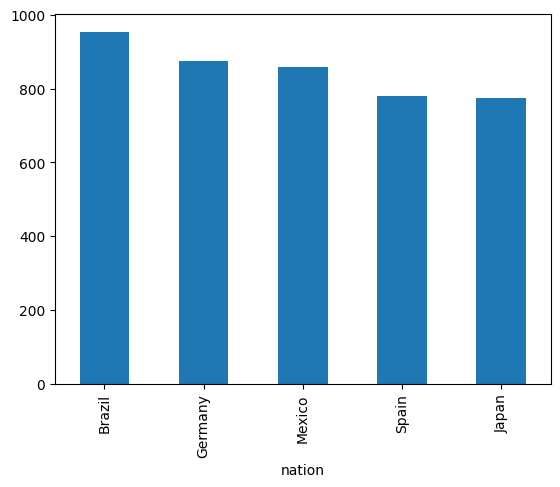

In [10]:
# 누적 득점 많은 나라 top5 그래프
df.groupby('nation')['score'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

이제껏 배운 것을 복습할겸 정렬을 하고 슬라이싱을 했지만 그것이 번거롭다면 간편한 함수 `nlargest`를 쓸 수 있다

작은 순서대로 뽑을 때는 `nsmallest`를 쓸 수 있다

- pandas 공식문서 nlargest : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
- pandas 공식문서 nsmallest : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html

In [11]:
# 간편한 함수 nlargest를 쓸 수도 있다
df.groupby('nation')['score'].sum().nlargest(5)

nation
Brazil     954
Germany    875
Mexico     858
Spain      781
Japan      776
Name: score, dtype: int64

국가별 평균 득점 집계하기

In [12]:
# 평균 득점이 높은 나라 top 5
df.groupby('nation')['score'].mean().sort_values(ascending=False)[:5]

nation
Germany         2.24
Spain           2.21
Brazil          2.20
New Caledonia   2.20
Netherlands     2.06
Name: score, dtype: float64

New Caledonia 와 같이 경기수가 적은 나라가 평균 득점 상위에 오르는 것을 방지하기 위해 

A매치 100경기 이상의 국가들만 평균 득점을 집계하겠다

In [13]:
# 총 게임수가 100경기 이상의 국가들만의 데이터
cond2 = df.groupby('nation')['score'].transform('count') >= 100
df[cond2]

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
...,...,...,...,...,...,...,...,...,...,...
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win
47841,2022-06-14,Egypt,Africa,Away,Korea,Asia,1,4,Frendly,Lose


In [14]:
# 100경기 이상 경기한 나라 중 평균 득점이 높은 5개국
df[cond2].groupby('nation')['score'].mean().sort_values(ascending=False)[:5]

nation
Germany       2.24
Spain         2.21
Brazil        2.20
Netherlands   2.06
Australia     2.05
Name: score, dtype: float64

<Axes: xlabel='nation'>

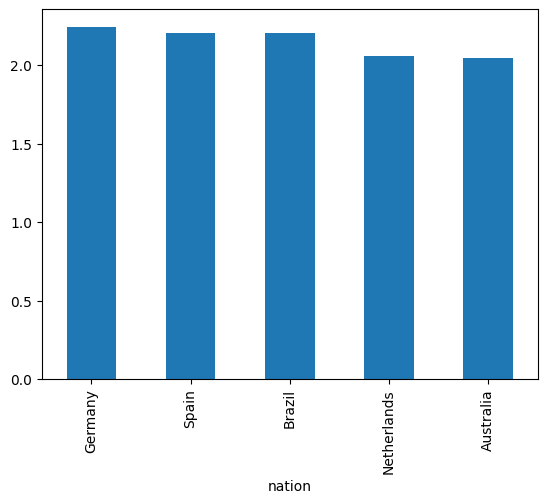

In [15]:
# 100경기 이상 경기한 나라 중 평균 득점이 높은 나라 그래프
df[cond2].groupby('nation')['score'].mean().sort_values(ascending=False)[:5].plot(kind='bar')

월드컵 다득점 국가 집계하기

In [16]:
# 전체 데이터에서 월드컵 관련 데이터만 필터링
cond3 = df['tournament'] == 'WC'
df[cond3]

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
770,1994-06-17,Germany,Europe,Home,Bolivia,South America,1,0,WC,Win
771,1994-06-17,Bolivia,South America,Away,Germany,Europe,0,1,WC,Lose
772,1994-06-17,Spain,Europe,Home,Korea,Asia,2,2,WC,Draw
...,...,...,...,...,...,...,...,...,...,...
40897,2018-07-14,England,Europe,Away,Belgium,Europe,0,2,WC,Lose
40898,2018-07-15,Croatia,Europe,Home,France,Europe,2,4,WC,Lose
40899,2018-07-15,France,Europe,Away,Croatia,Europe,4,2,WC,Win


In [17]:
# 월드컵 다득점 상위 5개국
df[cond3].groupby('nation')['score'].sum().sort_values(ascending=False)[:5]

nation
Brazil         81
Germany        79
Spain          56
Argentina      55
Netherlands    49
Name: score, dtype: int64

<Axes: xlabel='nation'>

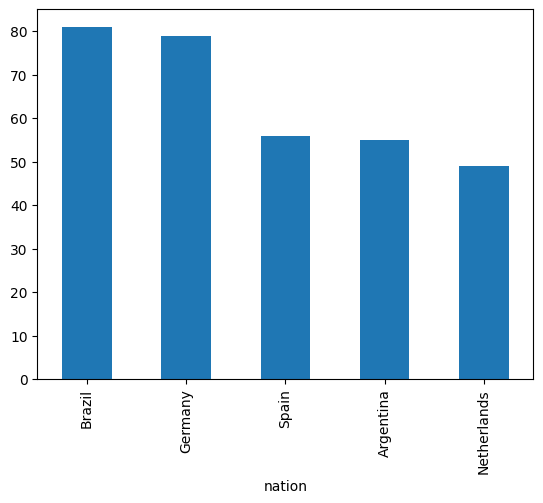

In [18]:
# 월드컵 다득점 상위 5개국 그래프
df[cond3].groupby('nation')['score'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

## 3. 한국축구 데이터를 groupby와 resample로 집계하기

In [19]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6
pd.options.display.float_format = '{:.2f}'.format
url = './12_01_soccer_match.csv'

# date 열을 datetime으로 적용해 데이터 프레임부르기
df = pd.read_csv(url, parse_dates=['date'])
df

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
...,...,...,...,...,...,...,...,...,...,...
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win
47841,2022-06-14,Egypt,Africa,Away,Korea,Asia,1,4,Frendly,Lose


In [20]:
# 한국의 데이터만 필터링하고 DatetimeIndex로 만들기
cond4 = df['nation'] == 'Korea'
df_kr = df[cond4].set_index('date')
df_kr

,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
date,,,,,,,,,
1993-09-24,Korea,Asia,Away,Australia,Oceania,1,1,Frendly,Draw
1993-09-26,Korea,Asia,Away,Australia,Oceania,1,0,Frendly,Win
1993-10-16,Korea,Asia,Away,IR Iran,Asia,3,0,Others,Win
...,...,...,...,...,...,...,...,...,...
2022-06-06,Korea,Asia,Home,Chile,South America,2,0,Frendly,Win
2022-06-10,Korea,Asia,Home,Paraguay,South America,2,2,Frendly,Draw
2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win


In [21]:
# 한국 데이터 중 2002년도의 데이터만 필터링
df_kr.loc['2002']

,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
date,,,,,,,,,
2002-01-19,Korea,Asia,Home,USA,North America,1,2,Others,Lose
2002-01-23,Korea,Asia,Away,Cuba,North America,0,0,Others,Draw
2002-01-27,Korea,Asia,Home,Mexico,North America,0,0,Others,Draw
...,...,...,...,...,...,...,...,...,...
2002-06-29,Korea,Asia,Away,Turkey,Europe,2,3,WC,Lose
2002-09-07,Korea,Asia,Away,Korea DPR,Asia,0,0,Frendly,Draw
2002-11-20,Korea,Asia,Away,Brazil,South America,2,3,Frendly,Lose


In [22]:
# 승률을 구하기 위한 lambda 함수 만들기 위해 시리즈 생성
x = pd.Series(['Win', 'Lose', 'Win', 'Draw'])
x

0     Win
1    Lose
2     Win
3    Draw
dtype: object

In [23]:
# x의 승률은 다음과 같다
(x == 'Win').mean()

0.5

In [24]:
# 비교연산 == 대신 연산함수 eq를 쓰면 좀 더 코드가 깔끔하다 (실습은 ==로 진행)
x.eq('Win').mean()

0.5

In [25]:
# 상대 대륙별 한국팀의 승률
df_kr.groupby('o_continent')['result'].agg(lambda x: (x == 'Win').mean())

o_continent
Africa          0.44
Asia            0.58
Europe          0.37
North America   0.40
Oceania         0.53
South America   0.31
Name: result, dtype: float64

In [26]:
# 승률을 구하는 lambda 함수는 자주 쓰게 될것 같으니 함수 wp로 선언하자
wp = lambda x: (x == 'Win').mean()
df_kr.groupby('o_continent')['result'].agg(wp)

o_continent
Africa          0.44
Asia            0.58
Europe          0.37
North America   0.40
Oceania         0.53
South America   0.31
Name: result, dtype: float64

In [27]:
# 한국의 상대 대륙별 승률과 평균 득점을 동시에
wp = lambda x: (x == 'Win').mean()
(df_kr
 .groupby('o_continent').agg({'result': wp, 'score': 'mean'})
 .set_axis(['wp', 'goal per game'], axis=1))

,wp,goal per game
o_continent,,
Africa,0.44,1.44
Asia,0.58,1.87
Europe,0.37,1.29
North America,0.40,1.34
Oceania,0.53,1.21
South America,0.31,1.00


In [28]:
# 연도별 한국의 승률
df_kr.resample('Y')['result'].agg(wp)

date
1993-12-31   0.43
1994-12-31   0.29
1995-12-31   0.33
             ... 
2020-12-31   0.50
2021-12-31   0.70
2022-12-31   0.70
Freq: A-DEC, Name: result, Length: 30, dtype: float64

<Axes: xlabel='date'>

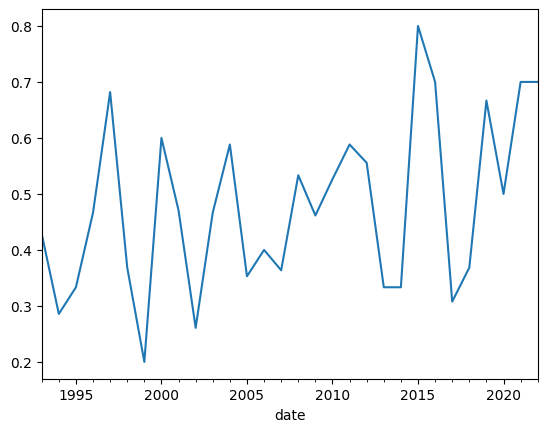

In [29]:
# 연도별 한국의 승률 그래프
df_kr.resample('Y')['result'].agg(wp).plot()

In [30]:
# 2002년의 승률 확인
df_kr.loc['2002', 'result'].value_counts(normalize=True)

result
Draw   0.39
Lose   0.35
Win    0.26
Name: proportion, dtype: float64

In [31]:
# 연도별 한국의 평균 득점
df_kr.resample('Y')['score'].mean()

date
1993-12-31   1.57
1994-12-31   1.36
1995-12-31   1.22
             ... 
2020-12-31   2.00
2021-12-31   2.00
2022-12-31   2.30
Freq: A-DEC, Name: score, Length: 30, dtype: float64

<Axes: xlabel='date'>

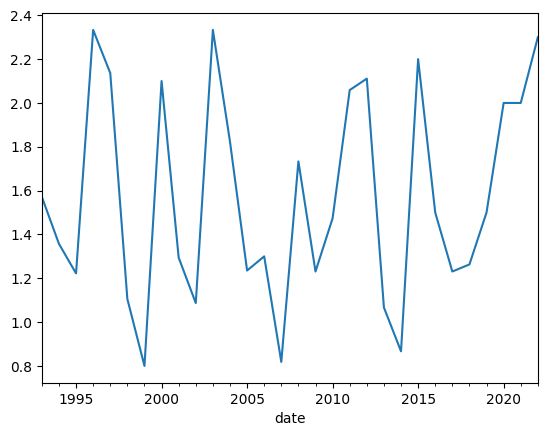

In [32]:
# 연도별 한국의 평균 득점 그래프
df_kr.resample('Y')['score'].mean().plot()